In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd

# Active learning

In [8]:
FMNIST_10_FEEDBACK = np.array([0.2345,0.74, 0.7, 0.68, 0.62, 0.78, 0.72, 0.68, 0.8, 0.66])
FMNIST_20_FEEDBACK = np.array([0.1508,0.5, 0.46, 0.44, 0.5, 0.38, 0.5, 0.46, 0.46, 0.46])
FMNIST_30_FEEDBACK = np.array([0.1601,0.58, 0.48, 0.36, 0.34, 0.5, 0.44, 0.54, 0.44, 0.46])

FMNIST_10_RANDOM = np.array([0.1971, 0.2, 0.2, 0.16, 0.14, 0.24, 0.3, 0.26, 0.14, 0.26, 0.3])
FMNIST_20_RANDOM = np.array([0.1179, 0.1, 0.18, 0.08, 0.08, 0.06, 0.12, 0.02, 0.04, 0.06, 0.12])
FMNIST_30_RANDOM = np.array([0.1311, 0.08, 0.12, 0.04, 0.02, 0.12, 0.1, 0.06, 0.14, 0.08, 0.04])

MNIST_10_FEEDBACK = np.array([0.026,0.76, 0.54, 0.48, 0.42, 0.42, 0.52, 0.54, 0.52, 0.56 ])
MNIST_20_FEEDBACK = np.array([0.0162, 0.02, 0.64, 0.66, 0.44, 0.42, 0.46, 0.46, 0.34, 0.38])
MNIST_30_FEEDBACK = np.array([0.0129,0.64, 0.48, 0.46, 0.56, 0.52, 0.38, 0.24, 0.46, 0.34])

MNIST_10_RANDOM = np.array([0.0213, 0.08, 0.0, 0.02, 0.02, 0.02, 0.0, 0.02, 0.04, 0.0, 0.0])
MNIST_20_RANDOM = np.array([0.0128, 0.02, 0.06, 0.02, 0.0, 0.0, 0.0, 0.02, 0.0, 0.04, 0.0])
MNIST_30_RANDOM = np.array([0.0106, 0.0, 0.0, 0.02, 0.02, 0.02, 0.0, 0.02, 0.0, 0.02, 0.04])

CIFAR10_10_FEEDBACK = np.array([0.5884,0.84, 0.78, 0.8, 0.76, 0.84, 0.82, 0.72, 0.74, 0.8, 0.82])
CIFAR10_20_FEEDBACK = np.array([0.3685, 0.72, 0.78, 0.68, 0.74, 0.7, 0.68, 0.78, 0.68, 0.8])
CIFAR10_30_FEEDBACK = np.array([0.3259,0.76, 0.76, 0.66, 0.82, 0.78, 0.76, 0.62, 0.64, 0.7])

CIFAR10_10_RANDOM = np.array([0.501, 0.4, 0.5, 0.62, 0.48, 0.56, 0.6, 0.44, 0.34, 0.48, 0.6])
CIFAR10_20_RANDOM = np.array([0.3392, 0.24, 0.28, 0.38, 0.34, 0.3, 0.3, 0.34, 0.32, 0.3, 0.32])
CIFAR10_30_RANDOM = np.array([0.3018, 0.26, 0.4, 0.36, 0.24, 0.32, 0.2, 0.44, 0.32, 0.28, 0.3])

In [9]:
# accumlative
AC_FMNIST_20_FEEDBACK = [FMNIST_20_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_MNIST_20_FEEDBACK = [MNIST_20_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_20_FEEDBACK = [CIFAR10_20_FEEDBACK[:i].mean() for i in range(1,11,1)]

AC_FMNIST_20_RANDOM = [FMNIST_20_RANDOM[:i].mean() for i in range(1,11,1)]
AC_MNIST_20_RANDOM = [MNIST_20_RANDOM[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_20_RANDOM = [CIFAR10_20_RANDOM[:i].mean() for i in range(1,11,1)]

In [10]:
# accumlative
AC_FMNIST_10_FEEDBACK = [FMNIST_10_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_MNIST_10_FEEDBACK = [MNIST_10_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_10_FEEDBACK = [CIFAR10_10_FEEDBACK[:i].mean() for i in range(1,11,1)]

AC_FMNIST_10_RANDOM = [FMNIST_10_RANDOM[:i].mean() for i in range(1,11,1)]
AC_MNIST_10_RANDOM = [MNIST_10_RANDOM[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_10_RANDOM = [CIFAR10_10_RANDOM[:i].mean() for i in range(1,11,1)]

# accumlative
AC_FMNIST_30_FEEDBACK = [FMNIST_30_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_MNIST_30_FEEDBACK = [MNIST_30_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_30_FEEDBACK = [CIFAR10_30_FEEDBACK[:i].mean() for i in range(1,11,1)]

AC_FMNIST_30_RANDOM = [FMNIST_30_RANDOM[:i].mean() for i in range(1,11,1)]
AC_MNIST_30_RANDOM = [MNIST_30_RANDOM[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_30_RANDOM = [CIFAR10_30_RANDOM[:i].mean() for i in range(1,11,1)]

In [11]:
pal20c = sns.color_palette('tab20c', 20)
cols_name = np.array(["dataset", "method", "iter", "eval"])
data = None
for i, v in enumerate(AC_FMNIST_20_FEEDBACK, start=1):
    if data is None:
        data = np.array(["FMNIST", "FEEDBACK", str(i), str(v)])
    else:
        data = np.vstack((np.array(["FMNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_FMNIST_20_RANDOM, start=1):
    data = np.vstack((np.array(["FMNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_20_RANDOM, start=1):
    data = np.vstack((np.array(["MNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_20_FEEDBACK, start=1):
    data = np.vstack((np.array(["MNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_20_FEEDBACK, start=1):
    data = np.vstack((np.array(["CIFAR10", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_20_RANDOM, start=1):
    data = np.vstack((np.array(["CIFAR10", "RANDOM", str(i), str(v)]), data))
df = pd.DataFrame(data, columns=cols_name)
df[["iter"]] = df[["iter"]].astype(int)
df[["eval"]] = df[["eval"]].astype(float)

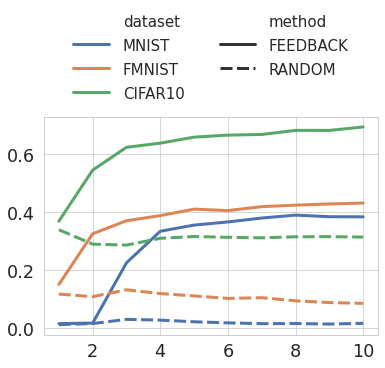

In [12]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.lineplot(data=df, x="iter", y="eval", hue="dataset", hue_order=["MNIST","FMNIST","CIFAR10"], style="method", style_order=["FEEDBACK","RANDOM"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
# fg.set_ylim(0., 1.0)
plt.setp(fg.get_legend().get_texts(), fontsize='15')
# fg.fig.suptitle("NN preserving property")
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_20.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

In [13]:
pal20c = sns.color_palette('tab20c', 20)
cols_name = np.array(["dataset", "method", "iter", "eval"])
data = None
for i, v in enumerate(AC_FMNIST_10_FEEDBACK, start=1):
    if data is None:
        data = np.array(["FMNIST", "FEEDBACK", str(i), str(v)])
    else:
        data = np.vstack((np.array(["FMNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_FMNIST_10_RANDOM, start=1):
    data = np.vstack((np.array(["FMNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_10_RANDOM, start=1):
    data = np.vstack((np.array(["MNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_10_FEEDBACK, start=1):
    data = np.vstack((np.array(["MNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_10_FEEDBACK, start=1):
    data = np.vstack((np.array(["CIFAR10", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_10_RANDOM, start=1):
    data = np.vstack((np.array(["CIFAR10", "RANDOM", str(i), str(v)]), data))


df = pd.DataFrame(data, columns=cols_name)
df[["iter"]] = df[["iter"]].astype(int)
df[["eval"]] = df[["eval"]].astype(float)

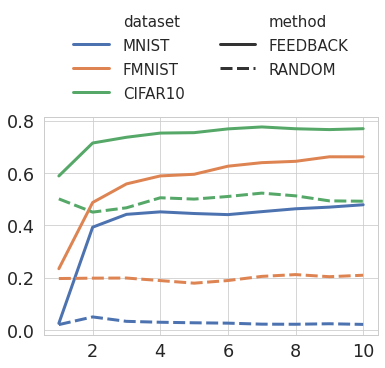

In [14]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.lineplot(data=df, x="iter", y="eval", hue="dataset", hue_order=["MNIST","FMNIST","CIFAR10"], style="method", style_order=["FEEDBACK","RANDOM"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
# fg.set_ylim(0., 1.0)
plt.setp(fg.get_legend().get_texts(), fontsize='15')
# fg.fig.suptitle("NN preserving property")
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_10.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

In [15]:
data = None
for i, v in enumerate(AC_FMNIST_30_FEEDBACK, start=1):
    if data is None:
        data = np.array(["FMNIST", "FEEDBACK", str(i), str(v)])
    else:
        data = np.vstack((np.array(["FMNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_FMNIST_30_RANDOM, start=1):
    data = np.vstack((np.array(["FMNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_30_RANDOM, start=1):
    data = np.vstack((np.array(["MNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_30_FEEDBACK, start=1):
    data = np.vstack((np.array(["MNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_30_FEEDBACK, start=1):
    data = np.vstack((np.array(["CIFAR10", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_30_RANDOM, start=1):
    data = np.vstack((np.array(["CIFAR10", "RANDOM", str(i), str(v)]), data))


df = pd.DataFrame(data, columns=cols_name)
df[["iter"]] = df[["iter"]].astype(int)
df[["eval"]] = df[["eval"]].astype(float)

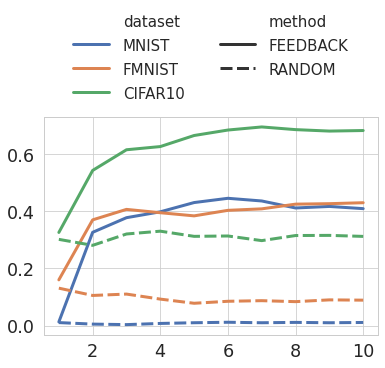

In [16]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.lineplot(data=df, x="iter", y="eval", hue="dataset", hue_order=["MNIST","FMNIST","CIFAR10"], style="method", style_order=["FEEDBACK","RANDOM"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
# fg.set_ylim(0., 1.0)
plt.setp(fg.get_legend().get_texts(), fontsize='15')
# fg.fig.suptitle("NN preserving property")
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/al_simulation_30.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

# NOISE

In [2]:
FMNIST_5_FEEDBACK = np.array([0.04, 1.0, 1.0, 0.98, 1.0, 1.0, 0.98, 0.96, 0.96, 1.0, 0.96])
FMNIST_10_FEEDBACK = np.array([0.14, 1.0, 0.98, 0.96, 0.96, 1.0, 0.98, 0.98, 1.0, 0.98, 0.98])
FMNIST_20_FEEDBACK = np.array([0.2305,1.0, 1.0, 0.98, 0.96, 0.98, 1.0, 1.0, 1.0, 0.98, 1.0])

FMNIST_5_RANDOM = np.array([0.0, 0.06, 0.06, 0.06, 0.08, 0.12, 0.04, 0.08, 0.04, 0.06, 0.06])
FMNIST_10_RANDOM = np.array([0.14, 0.08, 0.18, 0.1, 0.1, 0.08, 0.1, 0.12, 0.16, 0.1, 0.06])
FMNIST_20_RANDOM = np.array([0.1963, 0.2, 0.26, 0.12, 0.18, 0.2, 0.18, 0.24, 0.22, 0.22, 0.2])

MNIST_5_FEEDBACK = np.array([0.04, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
MNIST_10_FEEDBACK = np.array([0.14, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 0.98, 0.98, 1.0, 0.96])
MNIST_20_FEEDBACK = np.array([0.2414, 1.0, 0.96, 0.98, 1.0, 1.0, 0.96, 0.96, 0.98, 0.92, 1.0])

MNIST_5_RANDOM = np.array([0.04, 0.02, 0.04, 0.02, 0.02, 0.04, 0.04, 0.08, 0.28, 0.34, 0.36])
MNIST_10_RANDOM = np.array([0.1, 0.2, 0.08, 0.1, 0.04, 0.08, 0.08, 0.12, 0.1, 0.16, 0.1])
MNIST_20_RANDOM = np.array([0.1985, 0.32, 0.14, 0.26, 0.16, 0.14, 0.12, 0.2, 0.28, 0.3, 0.16])

CIFAR10_5_FEEDBACK = np.array([0.0536, 0.28, 0.34, 0.38, 0.28, 0.2, 0.18, 0.34, 0.28, 0.2, 0.14])
CIFAR10_10_FEEDBACK = np.array([0.14, 0.46, 0.22, 0.32, 0.3, 0.34, 0.4, 0.26, 0.18, 0.22, 0.22])
CIFAR10_20_FEEDBACK = np.array([0.2245, 0.74, 0.72, 0.6, 0.58, 0.7, 0.66, 0.62, 0.68, 0.7, 0.52])

CIFAR10_5_RANDOM = np.array([0.059, 0.02, 0.04, 0.08, 0.04, 0.08, 0.0, 0.04, 0.04, 0.04, 0.02, 0.04])
CIFAR10_10_RANDOM = np.array([0.12, 0.18, 0.06, 0.14, 0.1, 0.06, 0.04, 0.12, 0.08, 0.06, 0.12])
CIFAR10_20_RANDOM = np.array([0.1982, 0.22, 0.2, 0.24, 0.2, 0.22, 0.08, 0.2, 0.22, 0.22, 0.16])

In [3]:
# accumlative
AC_FMNIST_20_FEEDBACK = [FMNIST_20_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_MNIST_20_FEEDBACK = [MNIST_20_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_20_FEEDBACK = [CIFAR10_20_FEEDBACK[:i].mean() for i in range(1,11,1)]

AC_FMNIST_20_RANDOM = [FMNIST_20_RANDOM[:i].mean() for i in range(1,11,1)]
AC_MNIST_20_RANDOM = [MNIST_20_RANDOM[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_20_RANDOM = [CIFAR10_20_RANDOM[:i].mean() for i in range(1,11,1)]

# accumlative
AC_FMNIST_10_FEEDBACK = [FMNIST_10_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_MNIST_10_FEEDBACK = [MNIST_10_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_10_FEEDBACK = [CIFAR10_10_FEEDBACK[:i].mean() for i in range(1,11,1)]

AC_FMNIST_10_RANDOM = [FMNIST_10_RANDOM[:i].mean() for i in range(1,11,1)]
AC_MNIST_10_RANDOM = [MNIST_10_RANDOM[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_10_RANDOM = [CIFAR10_10_RANDOM[:i].mean() for i in range(1,11,1)]

# accumlative
AC_FMNIST_5_FEEDBACK = [FMNIST_5_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_MNIST_5_FEEDBACK = [MNIST_5_FEEDBACK[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_5_FEEDBACK = [CIFAR10_5_FEEDBACK[:i].mean() for i in range(1,11,1)]

AC_FMNIST_5_RANDOM = [FMNIST_5_RANDOM[:i].mean() for i in range(1,11,1)]
AC_MNIST_5_RANDOM = [MNIST_5_RANDOM[:i].mean() for i in range(1,11,1)]
AC_CIFAR10_5_RANDOM = [CIFAR10_5_RANDOM[:i].mean() for i in range(1,11,1)]

In [4]:
pal20c = sns.color_palette('tab20c', 20)
cols_name = np.array(["dataset", "method", "iter", "eval"])
data = None
for i, v in enumerate(AC_FMNIST_20_FEEDBACK, start=1):
    if data is None:
        data = np.array(["FMNIST", "FEEDBACK", str(i), str(v)])
    else:
        data = np.vstack((np.array(["FMNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_FMNIST_20_RANDOM, start=1):
    data = np.vstack((np.array(["FMNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_20_RANDOM, start=1):
    data = np.vstack((np.array(["MNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_20_FEEDBACK, start=1):
    data = np.vstack((np.array(["MNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_20_FEEDBACK, start=1):
    data = np.vstack((np.array(["CIFAR10", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_20_RANDOM, start=1):
    data = np.vstack((np.array(["CIFAR10", "RANDOM", str(i), str(v)]), data))
df = pd.DataFrame(data, columns=cols_name)
df[["iter"]] = df[["iter"]].astype(int)
df[["eval"]] = df[["eval"]].astype(float)

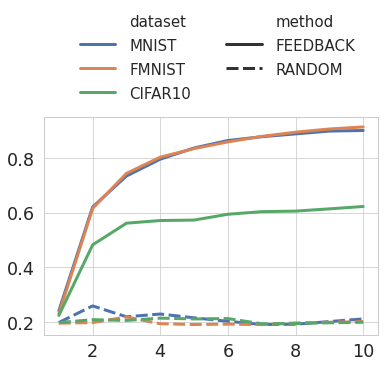

In [5]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.lineplot(data=df, x="iter", y="eval", hue="dataset", hue_order=["MNIST","FMNIST","CIFAR10"], style="method", style_order=["FEEDBACK","RANDOM"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(0.52, 1), ncol=2, title=None, frameon=False)
plt.setp(fg.get_legend().get_texts(), fontsize='15')
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_20.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

In [6]:
pal20c = sns.color_palette('tab20c', 20)
cols_name = np.array(["dataset", "method", "iter", "eval"])
data = None
for i, v in enumerate(AC_FMNIST_10_FEEDBACK, start=1):
    if data is None:
        data = np.array(["FMNIST", "FEEDBACK", str(i), str(v)])
    else:
        data = np.vstack((np.array(["FMNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_FMNIST_10_RANDOM, start=1):
    data = np.vstack((np.array(["FMNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_10_RANDOM, start=1):
    data = np.vstack((np.array(["MNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_10_FEEDBACK, start=1):
    data = np.vstack((np.array(["MNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_10_FEEDBACK, start=1):
    data = np.vstack((np.array(["CIFAR10", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_10_RANDOM, start=1):
    data = np.vstack((np.array(["CIFAR10", "RANDOM", str(i), str(v)]), data))
df = pd.DataFrame(data, columns=cols_name)
df[["iter"]] = df[["iter"]].astype(int)
df[["eval"]] = df[["eval"]].astype(float)

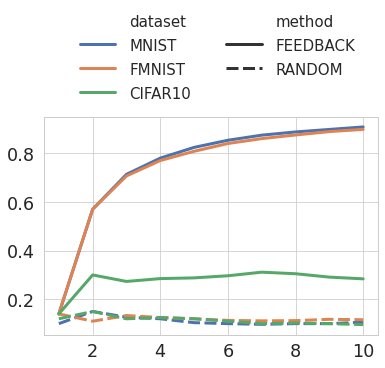

In [7]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.lineplot(data=df, x="iter", y="eval", hue="dataset", hue_order=["MNIST","FMNIST","CIFAR10"], style="method", style_order=["FEEDBACK","RANDOM"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(0.52, 1), ncol=2, title=None, frameon=False)
plt.setp(fg.get_legend().get_texts(), fontsize='15')
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_10.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)

In [8]:
pal20c = sns.color_palette('tab20c', 20)
cols_name = np.array(["dataset", "method", "iter", "eval"])
data = None
for i, v in enumerate(AC_FMNIST_5_FEEDBACK, start=1):
    if data is None:
        data = np.array(["FMNIST", "FEEDBACK", str(i), str(v)])
    else:
        data = np.vstack((np.array(["FMNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_FMNIST_5_RANDOM, start=1):
    data = np.vstack((np.array(["FMNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_5_RANDOM, start=1):
    data = np.vstack((np.array(["MNIST", "RANDOM", str(i), str(v)]), data))
for i,v in enumerate(AC_MNIST_5_FEEDBACK, start=1):
    data = np.vstack((np.array(["MNIST", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_5_FEEDBACK, start=1):
    data = np.vstack((np.array(["CIFAR10", "FEEDBACK", str(i), str(v)]), data))
for i,v in enumerate(AC_CIFAR10_5_RANDOM, start=1):
    data = np.vstack((np.array(["CIFAR10", "RANDOM", str(i), str(v)]), data))
df = pd.DataFrame(data, columns=cols_name)
df[["iter"]] = df[["iter"]].astype(int)
df[["eval"]] = df[["eval"]].astype(float)

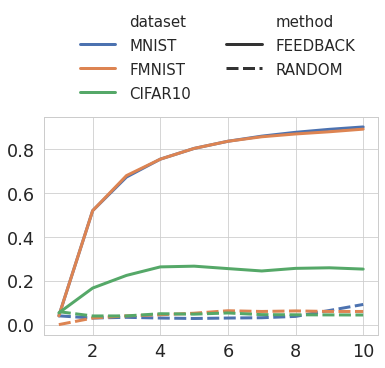

In [9]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 3}) 
fg = sns.lineplot(data=df, x="iter", y="eval", hue="dataset", hue_order=["MNIST","FMNIST","CIFAR10"], style="method", style_order=["FEEDBACK","RANDOM"], legend="full")
sns.move_legend(fg, "lower center", bbox_to_anchor=(0.52, 1), ncol=2, title=None, frameon=False)
plt.setp(fg.get_legend().get_texts(), fontsize='15')
fg.set(xlabel='', ylabel='')

fg.figure.savefig(
    "../singleVis/plot/plot_results/noise_simulation_5.png",
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    transparent=True,
)